In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv("forestfires.csv")

In [3]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.shape

(517, 31)

In [5]:
df.size_category[:4]

0    small
1    small
2    small
3    small
Name: size_category, dtype: object

In [6]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
#sns.pairplot(df)

In [8]:
## encode the data
df.month.replace(( 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 
      'nov', 'dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue', 'wed','thu','fri', 'sat', 'sun'),(1,2,3,4,5,6,7), inplace=True)

In [9]:
##I am taking small as 0 and large as 1
df.loc[df["size_category"]=='small','size_category']=0
df.loc[df["size_category"]=='large','size_category']=1
df["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [10]:
df.day[:10]

0    5
1    2
2    6
3    5
4    7
5    7
6    1
7    1
8    2
9    6
Name: day, dtype: int64

In [11]:
df.month[:10]

0     3
1    10
2    10
3     3
4     3
5     8
6     8
7     8
8     9
9     9
Name: month, dtype: int64

In [12]:
df.shape

(517, 31)

In [13]:
df.size_category.value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [14]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [15]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [17]:
df.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#As dummy variables are already created, we will remove the month and alsoday columns
df.drop(["month","day"],axis=1,inplace = True)

In [19]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
##I am taking small as 0 and large as 1
df.loc[df["size_category"]=='small','size_category']=0
df.loc[df["size_category"]=='large','size_category']=1
df["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

## Normalize the Data

In [21]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [22]:
#splitting the data
predictors = df.iloc[:,0:28]
target = df.iloc[:,28]
print(f' predictors {predictors.shape},, target {target.shape}')

 predictors (517, 28),, target (517,)


In [23]:
predictors

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#adding the predictor to normalizaition
predictors1 = norm_func(predictors)

In [25]:
## split the data xtrain ytrain
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(predictors1, target, test_size=0.3)

In [27]:
import matplotlib.pyplot as plt

In [28]:
print(X_train.shape),(X_test.shape)

(361, 28)


(None, (156, 28))

In [29]:
y_train[:4]

269    0
12     0
356    0
223    1
Name: size_category, dtype: object

In [30]:
X_train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
269,0.947097,0.522054,0.762636,0.254902,0.543408,0.447059,0.255556,0.0,0.004034,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.578065,0.240179,0.770963,0.014260,0.475884,0.670588,0.700000,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356,0.947097,0.337354,0.864782,0.171123,0.598071,0.235294,0.500000,0.0,0.001155,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
223,0.898065,0.514128,0.354169,0.121212,0.360129,0.752941,0.355556,0.0,0.033937,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
86,0.957419,0.468298,0.819163,0.163993,0.745981,0.141176,0.200000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.939355,0.497243,0.703999,0.190731,0.260450,0.694118,0.200000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
402,0.981935,0.778429,0.819514,0.213904,0.733119,0.247059,0.400000,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
463,0.727742,0.011371,0.009734,0.033868,0.077170,0.788235,0.655556,0.0,0.004941,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.962581,0.482771,0.827958,0.247772,0.816720,0.176471,0.100000,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## build the model

In [31]:
#building the model
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model

In [32]:
#fitting the model to x train & y train
first_model = prep_model([28,50,40,20,1])
first_model.fit(np.asarray(X_train).astype(np.int),np.asarray(y_train).astype(np.int),epochs=500)
pred_train = first_model.predict(np.array(X_train))

Epoch 1/500
12/12 [==============================] - 1s 2ms/step - loss: 0.6779 - accuracy: 0.6992
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.7318
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.7348
Epoch 4/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5685 - accuracy: 0.7529
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5583 - accuracy: 0.7510
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.7236
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.7632
Epoch 8/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5541 - accuracy: 0.7517
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.7268
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.7410
Epoch 11/

12/12 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.7554
Epoch 84/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4678 - accuracy: 0.7798
Epoch 85/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.7810
Epoch 86/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4695 - accuracy: 0.7861
Epoch 87/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.7765
Epoch 88/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4772 - accuracy: 0.7788
Epoch 89/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4888 - accuracy: 0.7652
Epoch 90/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7452
Epoch 91/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7725
Epoch 92/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.7785
Epoch 93/500


Epoch 164/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.7967
Epoch 165/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7728
Epoch 166/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7697
Epoch 167/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.7637
Epoch 168/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7573
Epoch 169/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.7873
Epoch 170/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.7936
Epoch 171/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.7970
Epoch 172/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.7665
Epoch 173/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5043 - accurac

12/12 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7600
Epoch 246/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.7464
Epoch 247/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7541
Epoch 248/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7574
Epoch 249/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.7822
Epoch 250/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.7657
Epoch 251/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.7915
Epoch 252/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.7820
Epoch 253/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.7851
Epoch 254/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4613 - accuracy: 0.7811
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.7857
Epoch 327/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4573 - accuracy: 0.7739
Epoch 328/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7592
Epoch 329/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.7830
Epoch 330/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7618
Epoch 331/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.7985
Epoch 332/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.7849
Epoch 333/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.7911
Epoch 334/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7532
Epoch 335/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.8010
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7457
Epoch 408/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4549 - accuracy: 0.7636
Epoch 409/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.7807
Epoch 410/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.7634
Epoch 411/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.7771
Epoch 412/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4914 - accuracy: 0.7450
Epoch 413/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.7888
Epoch 414/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7554
Epoch 415/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7535
Epoch 416/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.7777
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8150
Epoch 489/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7444
Epoch 490/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7544
Epoch 491/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.7718
Epoch 492/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.7867
Epoch 493/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.7709
Epoch 494/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7483
Epoch 495/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.7540
Epoch 496/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.7716
Epoch 497/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4442 - accuracy: 0.7873
Epoc

In [33]:
#Converting the predicted values to series 
pred_train = pd.Series([i[0] for i in pred_train])

In [34]:
size = ["small","large"]
pred_train_class = pd.Series(["small"]*361)
pred_train_class[[i>0.5 for i in pred_train]]= "large"

In [35]:
train = pd.concat([X_train,y_train],axis=1)
train["size_category"].value_counts()

0    266
1     95
Name: size_category, dtype: int64

In [36]:
#For training data
from sklearn.metrics import confusion_matrix
train["original_class"] = "small"
train.loc[train["size_category"]==1,"original_class"] = "large"
train.original_class.value_counts()
confusion_matrix(pred_train_class,train["original_class"])
np.mean(pred_train_class==pd.Series(train["original_class"]).reset_index(drop=True))

0.7423822714681441

In [37]:
#Confusion matrix for train data
pd.crosstab(pred_train_class,pd.Series(train["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
large,2,0
small,93,266


In [38]:
#For test data
pred_test = first_model.predict(X_test)
pred_test = pd.Series([i[0] for i in pred_test])
pred_test_class = pd.Series(["small"]*156)
pred_test_class[[i>0.5 for i in pred_test]] = "large"
test =pd.concat([X_test,y_test],axis=1)
test["original_class"]="small"
test.loc[test["size_category"]==1,"original_class"] = "large"

In [39]:
test["original_class"].value_counts()
np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop=True))

0.7243589743589743

In [40]:
#confusion matrix for test data
confusion_matrix(pred_test_class,test["original_class"])
pd.crosstab(pred_test_class,pd.Series(test["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
large,1,0
small,43,112


## Building Different models using diffrent loss function and optimizer

In [51]:
from keras import Sequential
#model = Sequential()

In [54]:
#building the model
#def prep_model(hidden_dim):
 #   model = Sequential()
  #  for i in range(1,len(hidden_dim)-1):
   #     if (i==1):
    #        model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
     #   else:
     #       model.add(Dense(hidden_dim[i],activation="relu"))
    #model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="linear"))
    #model.compile(loss="mean_squared_error",optimizer = "adam",metrics = ["mse"])
    #return model

In [55]:
#building the model
#def prep_model(hidden_dim):
hidden_dim = [28,50,40,20,1]
model = Sequential()
for i in range(1,len(hidden_dim)-1):
    if (i==1):
        model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
    else:
        model.add(Dense(hidden_dim[i],activation="relu"))
model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="linear"))
model.compile(loss="mean_squared_error",optimizer = "adam",metrics = ["mse"])
print(model)

In [56]:
#fitting the model to x train & y train
first_model = prep_model([28,50,40,20,1])
first_model.fit(np.asarray(X_train).astype(np.int),np.asarray(y_train).astype(np.int),epochs=500)
pred_train = first_model.predict(np.array(X_train))

Epoch 1/500
12/12 [==============================] - 1s 3ms/step - loss: 0.2411 - mse: 0.2411
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 0.2189 - mse: 0.2189
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1720 - mse: 0.1720
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 0.2129 - mse: 0.2129
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1938 - mse: 0.1938
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1929 - mse: 0.1929
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1761 - mse: 0.1761
Epoch 8/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1789 - mse: 0.1789
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1804 - mse: 0.1804
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1882 - mse: 0.1882
Epoch 11/500
12/12 [==============================] - 0s 2m

12/12 [==============================] - 0s 2ms/step - loss: 0.1604 - mse: 0.1604
Epoch 88/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1621 - mse: 0.1621
Epoch 89/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1411 - mse: 0.1411
Epoch 90/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1565 - mse: 0.1565
Epoch 91/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1504 - mse: 0.1504
Epoch 92/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1526 - mse: 0.1526
Epoch 93/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1484 - mse: 0.1484
Epoch 94/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1508 - mse: 0.1508
Epoch 95/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1552 - mse: 0.1552
Epoch 96/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1432 - mse: 0.1432
Epoch 97/500
12/12 [==============================] - 0s 2ms/st

12/12 [==============================] - 0s 2ms/step - loss: 0.1638 - mse: 0.1638
Epoch 173/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1553 - mse: 0.1553
Epoch 174/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1549 - mse: 0.1549
Epoch 175/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1455 - mse: 0.1455
Epoch 176/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1570 - mse: 0.1570
Epoch 177/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1561 - mse: 0.1561
Epoch 178/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1556 - mse: 0.1556
Epoch 179/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1540 - mse: 0.1540
Epoch 180/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1515 - mse: 0.1515
Epoch 181/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1500 - mse: 0.1500
Epoch 182/500
12/12 [==============================] -

12/12 [==============================] - 0s 2ms/step - loss: 0.1682 - mse: 0.1682
Epoch 258/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1502 - mse: 0.1502
Epoch 259/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1613 - mse: 0.1613
Epoch 260/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1448 - mse: 0.1448
Epoch 261/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1649 - mse: 0.1649
Epoch 262/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1485 - mse: 0.1485
Epoch 263/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1519 - mse: 0.1519
Epoch 264/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1367 - mse: 0.1367
Epoch 265/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1478 - mse: 0.1478
Epoch 266/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1544 - mse: 0.1544
Epoch 267/500
12/12 [==============================] -

12/12 [==============================] - 0s 2ms/step - loss: 0.1661 - mse: 0.1661
Epoch 343/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1553 - mse: 0.1553
Epoch 344/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1551 - mse: 0.1551
Epoch 345/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1440 - mse: 0.1440
Epoch 346/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1445 - mse: 0.1445
Epoch 347/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1470 - mse: 0.1470
Epoch 348/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1545 - mse: 0.1545
Epoch 349/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1542 - mse: 0.1542
Epoch 350/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1517 - mse: 0.1517
Epoch 351/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1585 - mse: 0.1585
Epoch 352/500
12/12 [==============================] -

12/12 [==============================] - 0s 2ms/step - loss: 0.1326 - mse: 0.1326
Epoch 428/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1485 - mse: 0.1485
Epoch 429/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1551 - mse: 0.1551
Epoch 430/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1542 - mse: 0.1542
Epoch 431/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1595 - mse: 0.1595
Epoch 432/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1644 - mse: 0.1644
Epoch 433/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1520 - mse: 0.1520
Epoch 434/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1517 - mse: 0.1517
Epoch 435/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1643 - mse: 0.1643
Epoch 436/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1583 - mse: 0.1583
Epoch 437/500
12/12 [==============================] -

In [57]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
#X_train = np.asarray(X_train).astype('float32')
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

In [61]:
# Fit the model
hist=model.fit(np.array(X_train),np.array(y_train), validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
25/25 [==============================] - 1s 19ms/step - loss: 0.7487 - accuracy: 0.7478 - val_loss: 0.5941 - val_accuracy: 0.7333
Epoch 2/150
25/25 [==============================] - 0s 5ms/step - loss: 0.5857 - accuracy: 0.7313 - val_loss: 0.5827 - val_accuracy: 0.7333
Epoch 3/150
25/25 [==============================] - 0s 5ms/step - loss: 0.5143 - accuracy: 0.7860 - val_loss: 0.5825 - val_accuracy: 0.7333
Epoch 4/150
25/25 [==============================] - 0s 5ms/step - loss: 0.5729 - accuracy: 0.7233 - val_loss: 0.5844 - val_accuracy: 0.7333
Epoch 5/150
25/25 [==============================] - 0s 5ms/step - loss: 0.5381 - accuracy: 0.7516 - val_loss: 0.5845 - val_accuracy: 0.7333
Epoch 6/150
25/25 [==============================] - 0s 5ms/step - loss: 0.5120 - accuracy: 0.7632 - val_loss: 0.5845 - val_accuracy: 0.7333
Epoch 7/150
25/25 [==============================] - 0s 6ms/step - loss: 0.5364 - accuracy: 0.7432 - val_loss: 0.5873 - val_accuracy: 0.7333
Epoch 8/150


Epoch 59/150
25/25 [==============================] - 0s 5ms/step - loss: 0.2636 - accuracy: 0.8727 - val_loss: 2.2296 - val_accuracy: 0.7333
Epoch 60/150
25/25 [==============================] - 0s 5ms/step - loss: 0.2608 - accuracy: 0.8925 - val_loss: 2.1119 - val_accuracy: 0.7500
Epoch 61/150
25/25 [==============================] - 0s 5ms/step - loss: 0.5505 - accuracy: 0.8868 - val_loss: 2.1997 - val_accuracy: 0.7333
Epoch 62/150
25/25 [==============================] - 0s 5ms/step - loss: 0.2386 - accuracy: 0.8679 - val_loss: 2.1066 - val_accuracy: 0.7500
Epoch 63/150
25/25 [==============================] - 0s 5ms/step - loss: 0.2148 - accuracy: 0.9041 - val_loss: 2.2984 - val_accuracy: 0.7083
Epoch 64/150
25/25 [==============================] - 0s 5ms/step - loss: 0.2449 - accuracy: 0.8872 - val_loss: 2.3010 - val_accuracy: 0.7250
Epoch 65/150
25/25 [==============================] - 0s 5ms/step - loss: 0.2238 - accuracy: 0.8963 - val_loss: 2.3015 - val_accuracy: 0.7250
Epoch 

25/25 [==============================] - 0s 5ms/step - loss: 0.1924 - accuracy: 0.9507 - val_loss: 2.2370 - val_accuracy: 0.7833
Epoch 117/150
25/25 [==============================] - 0s 5ms/step - loss: 0.1562 - accuracy: 0.9431 - val_loss: 1.9328 - val_accuracy: 0.8000
Epoch 118/150
25/25 [==============================] - 0s 5ms/step - loss: 0.1722 - accuracy: 0.9481 - val_loss: 2.2237 - val_accuracy: 0.7917
Epoch 119/150
25/25 [==============================] - 0s 5ms/step - loss: 0.1170 - accuracy: 0.9642 - val_loss: 2.0155 - val_accuracy: 0.7667
Epoch 120/150
25/25 [==============================] - 0s 5ms/step - loss: 0.1894 - accuracy: 0.9364 - val_loss: 1.9198 - val_accuracy: 0.8083
Epoch 121/150
25/25 [==============================] - 0s 5ms/step - loss: 0.1228 - accuracy: 0.9490 - val_loss: 1.9089 - val_accuracy: 0.8000
Epoch 122/150
25/25 [==============================] - 0s 5ms/step - loss: 0.1548 - accuracy: 0.9660 - val_loss: 2.1228 - val_accuracy: 0.8000
Epoch 123/150

In [62]:
# evaluate the model
scores = model.evaluate(X_train,y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

12/12 [==============================] - 0s 3ms/step - loss: 0.8080 - accuracy: 0.8947
accuracy: 89.47%


## This we are getting the best acurracy using loss="binary_crossentropy",optimizer = "rmsprop".

In [63]:
# Visualize training history

# list all data in history
model.history.history.keys()

dict_keys([])

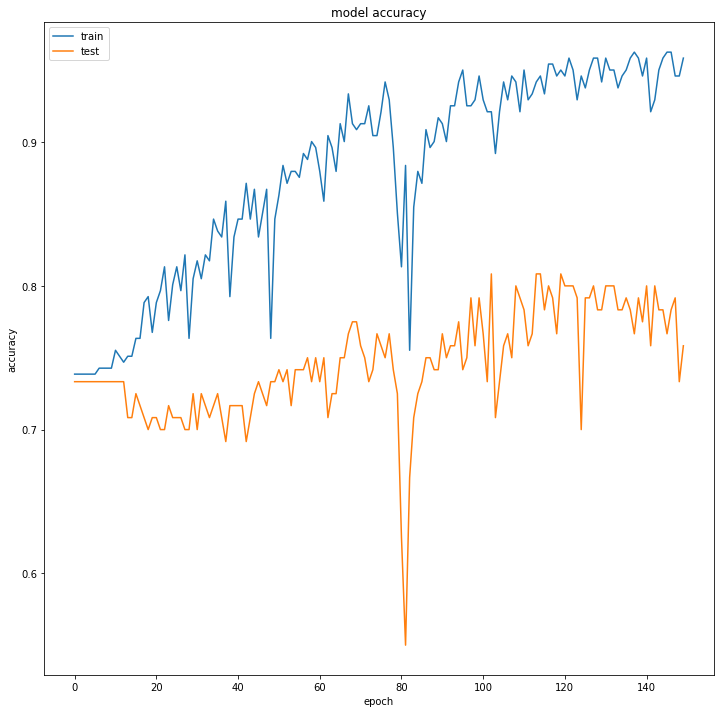

In [65]:
# summarize history for accuracy
plt.figure(figsize = (12,12))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

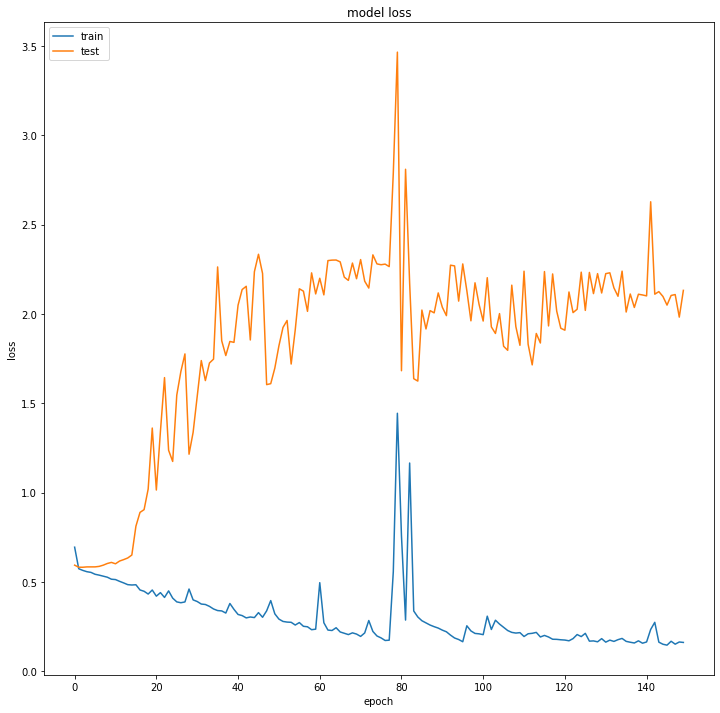

In [66]:
# summarize history for loss
plt.figure(figsize = (12,12))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()